# Análise Exploratória de Dados

O objetivo desse notebook é extrair insights a partir de um conjunto de dados sobre venda de casa no condado de King, nos E.U.A. Para isso, realizaremos uma análise exploratória de dados usando Python. O dataset usado pode ser baixado no link a seguir https://www.kaggle.com/harlfoxem/housesalesprediction.

# Importando bibliotecas necessárias

In [33]:
# Filtragem dos avisos, pois se trata de um notebook onde o foco é resultado.
# Aplicações devem evitar isso para não perder evidências úteis de erros.
import warnings
warnings.filterwarnings('ignore')

# suporte a arrays e matrizes multidimensionais
import numpy as np
# plotagem semelhante ao MATLAB
import matplotlib as mpl
# diversas funções de plotagem
import matplotlib.pyplot as plt 
# manipulação e análise de dados, tais como tabelas e séries temporais
import pandas as pd
# distribuições de probabilidade e funções estatísticas
import scipy.stats as st
# visualização de dados em alto nível
import seaborn as sns

# padronização de características: média zero e variância unitária
from sklearn.preprocessing import StandardScaler
# divisão de arrays e matrizes em subconjuntos, útil para cross validation
from sklearn.model_selection import train_test_split
# busca em gradem, útil para seleção de hiperparâmetros
from sklearn.model_selection import GridSearchCV
# coeficiente de determinação para regressão
from sklearn.metrics import r2_score

# modelos para regressãp
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
# SVM para problemas de regressão
from sklearn.svm import SVR
# algoritmos ensemble (comitê de modelos) para regressão
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# algoritmo Extreme Gradient Boosting, do tipo ensemble
from xgboost import XGBRegressor

# Carregando os dados

In [34]:
df = pd.read_csv("kc_house_data.csv")
df = df.drop(columns = ['id', 'date', 'waterfront', 'view'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Aqui podemos olhar as colunas da tabela e as características (features) que poderão ser usadas nesta análise.

As informações contidas no dataset que serão usadas na análise são:

price: preço da casa

bedrooms: número de quartos

bathrooms: número de banheiros

sqft_living: área da cada

sqft_lot: área do terreno onde a casa está inserida

yr_built: ano de construção

yr_renovated: ano em que a casa foi reformada

zipcode: localização da casa

Tamanho dos nossos registros

In [35]:
print(df.shape)
print(df['price'].shape)

(21613, 17)
(21613,)


A tabela contém 21613 linhas e 21 colunas.

# Verificando dados nulos

In [36]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Encontrando quais variáveis independentes têm maior correlação com a variável dependente.

In [37]:
# escolhendo as variáveis independentes
x = df[['bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'sqft_living', 'grade', 'floors', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# variável dependente
y = df[['price']]

#df.loc[::2] = np.nan
feature1 = 'bedrooms'
feature2 = 'bathrooms'
feature3 = 'sqft_above'
feature4 = 'sqft_basement'
feature5 = 'sqft_living'
feature6 = 'yr_built'
feature7 = 'yr_renovated'
feature8 = 'sqft_living15'
def Correlacoes():
    print("Feature\t\t\t\tR2")
    print("---------------------------------------------------")
    print("%s:\t\t\t%f" % (feature1, df['price'].corr(df['bedrooms'])))
    print("%s:\t\t\t%f" % (feature2, df['price'].corr(df['bathrooms'])))
    print("%s:\t\t\t%f" % (feature3, df['price'].corr(df['sqft_above'])))
    print("%s:\t\t\t%f" % (feature4, df['price'].corr(df['sqft_basement'])))
    print("%s:\t\t\t%f" % (feature5, df['price'].corr(df['sqft_living'])))
    print("%s:\t\t\t%f" % (feature6, df['price'].corr(df['yr_built'])))
    print("%s:\t\t\t%f" % (feature7, df['price'].corr(df['yr_renovated'])))
    print("%s:\t\t\t%f" % (feature8, df['price'].corr(df['sqft_living15'])))
Correlacoes()
    
    

Feature				R2
---------------------------------------------------
bedrooms:			0.308350
bathrooms:			0.525138
sqft_above:			0.605567
sqft_basement:			0.323816
sqft_living:			0.702035
yr_built:			0.054012
yr_renovated:			0.126434
sqft_living15:			0.585379


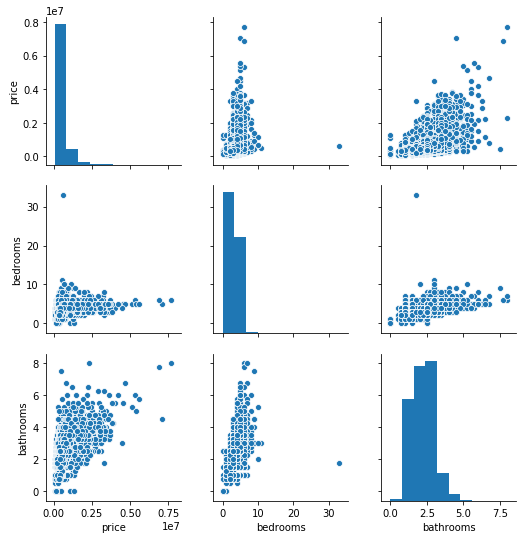

In [38]:
data = df[['price', 'bedrooms', 'bathrooms']]
sns.pairplot(data)

Construindo o modelo

In [41]:
# 80% das amostras são usadas para treinamento, 20% para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# padronização dos vetores característicos (features)
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# nomes identificando os modelos de regressão
names = ['Linear',
         'Ridge',
         'Lasso',
         'Random Forrest',
         'GBDT',
         'Support Vector Regression',
         'ElasticNet',
         'XgBoost'
        ]

# instancia diversos métodos de regressão correspondentes aos nomes
models = [LinearRegression(),
          RidgeCV(alphas=(0.001,0.1,1),cv=3),
          LassoCV(alphas=(0.001,0.1,1),cv=5),
          RandomForestRegressor(n_estimators=10),
          GradientBoostingRegressor(n_estimators=30),
          SVR(),
          ElasticNet(alpha=0.001,max_iter=10000),
          XGBRegressor()]

def R2(model, x_train, x_test, y_train, y_test):
  """ Ajusta o modelo aos dados de treinamento (x_train e y_train).
      Computa o Coeficiente de Determinação para a predição realizada
      por aquele modelo para os dados de teste: uma predição perfeita
      possui score 1.0
  """
  model_fitted = model.fit(x_train,y_train)
  y_pred = model_fitted.predict(x_test)
  score = r2_score(y_test, y_pred)
  return score

# efetua o ajuste dos modelos e exibe o resultado.
for name,model in zip(names,models):
  score = R2(model,x_train, x_test, y_train, y_test)
  print('{}: {:.6f}, {:.4f}'.format(name,score.mean(),score.std()))
        
print('Optimal parameter list:', model.best_params_)
print('Optimal model:', model.best_estimator_)
print('Optimal R2 value (train):', model.best_score_)

# define os parâmetros da busca exaustiva: todas as combinações
parameters = {
    'kernel': ['linear', 'rbf' ],
        'C' : [0.1  , 0.5 ,0.9,1,5],
    'gamma' : [0.001, 0.01,0.1,1]
}

# busca exaustiva (grid search) com 3-fold cross validation
print("starting exhaustive search... (please wait)")
model = GridSearchCV( SVR(), param_grid=parameters, cv=3 )
model.fit(x_train, y_train)

# verifica o score nos dados de teste
y_pred = model.predict(x_test)
best_score_test = r2_score(y_test, y_pred)
print('Optimal R2 value (test) :', best_score_test )        

Linear: 0.656981, 0.0000
Ridge: 0.656983, 0.0000
Lasso: 0.656981, 0.0000
Random Forrest: 0.840709, 0.0000
GBDT: 0.788520, 0.0000
Support Vector Regression: -0.058792, 0.0000
ElasticNet: 0.657000, 0.0000
XgBoost: 0.853778, 0.0000


AttributeError: 'XGBRegressor' object has no attribute 'best_params_'

Pdemos observar que o modelo que usa XgBoost apresenta a melhor performance, seguido do que usa Random Forrest.